In [1]:
from pprint import pprint

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
import seaborn as sns

In [2]:
root = "/Users/runlanlana/Documents/2023_Spring/MIT6.C85_Interactive Data Visualization and Society/Data Client Project/"

# Main

In [3]:
ctam_main_df = pd.read_csv(root + "dataset-1_central-american-survey/main_table.csv", index_col = 0)
display(ctam_main_df.head(3))

ctam_main_df.info(verbose = True, show_counts = True)

,start,end,note_confidenciality,organizacion,survey_pid,country,departamento,municipio,neighborhood,rural_urban,...,_tags,rsp_id,family_type_reduced,migrated_yn,dp_ratio,income_per_capita,monthly_expenditure,exp_food_pct,income_sources,migrated_yn_5
0,2021-05-13T09:29:28.324-06:00,2021-05-13T09:59:31.341-06:00,NaN,1,34,SLV,1193,15748,Condominios delgado,2,...,NaN,4998,3,0,0.500000,3.666667,301.0,0.282392,3,0
1,2021-05-13T08:44:14.642-06:00,2021-05-13T09:05:10.406-06:00,NaN,1,34,SLV,1193,15748,Condominios santa maria,2,...,NaN,4997,1,0,0.500000,166.666667,305.0,0.491803,3,0
2,2021-05-13T08:10:59.086-06:00,2021-05-13T08:43:16.923-06:00,NaN,1,34,SLV,1193,15748,Condominios santa maria,2,...,NaN,4996,3,0,0.333333,75.000000,234.0,0.427350,3,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 455 columns):
 #    Column                        Non-Null Count  Dtype  
---   ------                        --------------  -----  
 0    start                         4998 non-null   object 
 1    end                           4998 non-null   object 
 2    note_confidenciality          0 non-null      float64
 3    organizacion                  4998 non-null   int64  
 4    survey_pid                    4998 non-null   int64  
 5    country                       4998 non-null   object 
 6    departamento                  4998 non-null   object 
 7    municipio                     4998 non-null   object 
 8    neighborhood                  4998 non-null   object 
 9    rural_urban                   4998 non-null   int64  
 10   note_consent_1                0 non-null      float64
 11   note_consent_2                0 non-null      float64
 12   note_consent_3                0 non-null      

In [4]:
ctam_main_df['country'].unique()

array(['SLV', 'HND', 'GT'], dtype=object)

In [5]:
# check that multiple choice answers are exxpanded to binary columns correctly
multichoices = ['vulnerability_longterm', 'mig_ext_pref_motivo', 
                'mig_ext_pref_no_plan', 'mig_ext_pref_preparacion',
                'mig_int_pref_motivo', 'mig_int_pref_no_plan', 
                'mig_int_pref_preparacion', 'mig_motivo_stay',
                'mig_ext_opinion_good', 'mig_ext_opinion_bad', 
                'remesa_parentesco', 'remesa_efectivo_uso', 'remesa_efectivo_cobro',
                'remesa_especie', 'programas_asistencia_gob',
                'programas_asistencia', 'inseguridad_comunidad']
for m in multichoices:
    for index, row in ctam_main_df.iterrows():
        if not row[m]:
            answers = row[m].split(" ")
            for a in answers:
                assert row[m + '/' + a] == 1

Merge municipal labels

In [6]:
municipal_labels = pd.read_csv(root + "utilities/municipio_labels.csv")
# municipal_labels
ctam_main_df = ctam_main_df.merge(municipal_labels, how = 'left', 
                   on = 'municipio')

Clean hh size: there are 23 hhs indicating size of 0. prob by mistaken

In [7]:
ctam_main_df[ctam_main_df['hh_size'] == 0]['tipo_familia'].value_counts()

9    12
1     6
2     3
8     1
4     1
Name: tipo_familia, dtype: int64

In [8]:
print(len(ctam_main_df[ctam_main_df['hh_size'] == 0]))
ctam_main_df.loc[(ctam_main_df['hh_size'] == 0) & (ctam_main_df['tipo_familia'] == 9), 'hh_size'] = 1
ctam_main_df.loc[(ctam_main_df['hh_size'] == 0) & (ctam_main_df['tipo_familia'] == 1), 'hh_size'] = 3
ctam_main_df.loc[(ctam_main_df['hh_size'] == 0) & (ctam_main_df['tipo_familia'] == 2), 'hh_size'] = 2
ctam_main_df.loc[(ctam_main_df['hh_size'] == 0) & (ctam_main_df['tipo_familia'] == 4), 'hh_size'] = 3
ctam_main_df.loc[(ctam_main_df['hh_size'] == 0) & (ctam_main_df['tipo_familia'] == 8), 'hh_size'] = 2

23


## Reasons to migrate externally

In [9]:
# 3.1 Ideally, if you had the opportunity, would you like to move permanently or for a long period to another country?
print(ctam_main_df['mig_ext_intention'].unique())
# 3.3 Are you planning to move to another country in the next 12 months?
print(ctam_main_df['mig_ext_plan_12months'].unique())

[ 0  1 99]
[nan  0.  1. 99.]


In [10]:

ctam_main_df[ctam_main_df['mig_ext_intention'] == 0]['mig_ext_plan_12months'].unique()
# Note: those who do not intend to migrate ext or NS (0, 99) will have mig_ext_plan_12months = NAN
# Note: those who do intend to migrate ext (0) will have mig_ext_plan_12months = 0/1/99

array([nan])

In [11]:
ctam_main_df[ctam_main_df['mig_ext_intention'] == 99]['mig_ext_pref_motivo'].unique()
# Note: those who do not intend to migrate ext or NS (0, 99) will have mig_ext_pref_motivo = NAN

array([nan], dtype=object)

In [12]:
# 3.2 What are the main reasons why you would like to move to another country?
# mig_ext_pref_motivo/
cols_to_keep = [f'mig_ext_pref_motivo/{n}' for n in range(1, 17)] + ['mig_ext_pref_motivo/99']
mig_ext_motivo_df = ctam_main_df[['mig_ext_intention', 'mig_ext_plan_12months'] + cols_to_keep]


In [13]:
mig_ext_motivo_df

,mig_ext_intention,mig_ext_plan_12months,mig_ext_pref_motivo/1,mig_ext_pref_motivo/2,mig_ext_pref_motivo/3,mig_ext_pref_motivo/4,mig_ext_pref_motivo/5,mig_ext_pref_motivo/6,mig_ext_pref_motivo/7,mig_ext_pref_motivo/8,mig_ext_pref_motivo/9,mig_ext_pref_motivo/10,mig_ext_pref_motivo/11,mig_ext_pref_motivo/12,mig_ext_pref_motivo/13,mig_ext_pref_motivo/14,mig_ext_pref_motivo/15,mig_ext_pref_motivo/16,mig_ext_pref_motivo/99
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4994,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4995,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
mig_ext_motivo_df_pct = mig_ext_motivo_df[mig_ext_motivo_df['mig_ext_intention'] == 1].mean().to_frame(name = 'percentage')
mig_ext_motivo_df_pct.drop(index = ['mig_ext_intention', 'mig_ext_plan_12months'], inplace = True)
mig_ext_motivo_df_pct.reset_index(inplace = True, names = 'motivation_choice')
mig_ext_motivo_df_pct['motivation_choice'] = mig_ext_motivo_df_pct['motivation_choice'].str.replace("mig_ext_pref_motivo/", "")
mig_ext_motivo_df_pct['percentage'] = mig_ext_motivo_df_pct['percentage'] * 100

choice_labels = {"1": 'Search for a better job',
                 "2": "Unemployment",
                 "3": "Deterioration of livelihoods due to natural hazards",
                 "4": "By the direct impact of a natural hazard",
                 "5": "Due to loss of land (use change)",
                 "6": "Lack of money for food",
                 "7": "Lack of money for other basic needs",
                 "8": "To send remittances",
                 "9": "For study",
                 "10": "Domestic violence",
                 "11": "Unsafety",
                 "12": "Family reunification",
                 "13": "For cultural reasons or custom",
                 "14": "For healthcare",
                 "15": "Adventure Tourism",
                 "16": "Other",
                 "99": "Not sure"
                 }
mig_ext_motivo_df_pct['motivation'] = mig_ext_motivo_df_pct['motivation_choice'].map(choice_labels)

mig_ext_motivo_df_pct


,motivation_choice,percentage,motivation
0,1,82.907571,Search for a better job
1,2,30.654900,Unemployment
2,3,3.947980,Deterioration of livelihoods due to natural ha...
3,4,1.811426,By the direct impact of a natural hazard
4,5,0.418021,Due to loss of land (use change)
5,6,17.185323,Lack of money for food
6,7,24.431026,Lack of money for other basic needs
7,8,17.882025,To send remittances
8,9,2.879703,For study
9,10,0.232234,Domestic violence


Text(0, 0.5, 'Reasons')

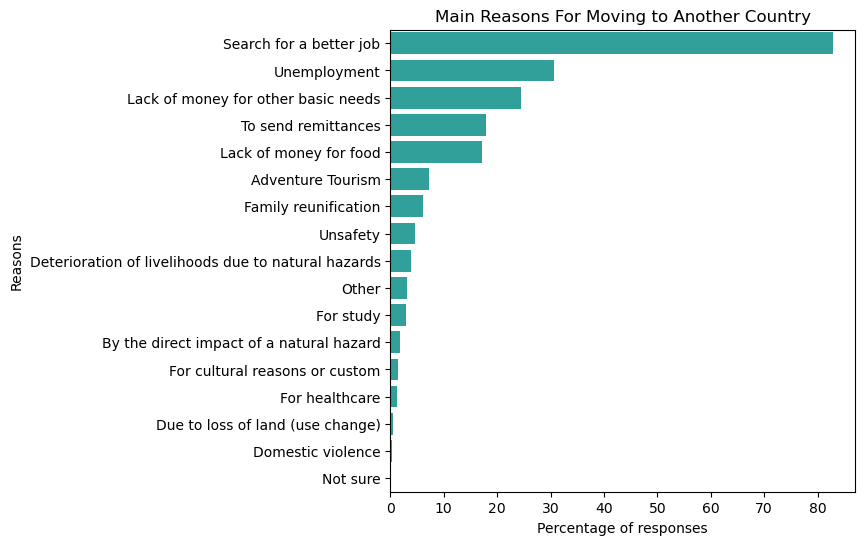

In [15]:
fig, ax = plt.subplots(figsize = (6, 6))
sns.barplot(data = mig_ext_motivo_df_pct.sort_values("percentage", ascending = False), 
            y = 'motivation', x = 'percentage',
            color = 'lightseagreen')
plt.title("Main Reasons For Moving to Another Country")
plt.xlabel("Percentage of responses")
plt.ylabel("Reasons")

In [16]:
mig_ext_motivo_df_pct_by_plan = mig_ext_motivo_df[mig_ext_motivo_df['mig_ext_intention'] == 1].groupby('mig_ext_plan_12months').mean()

mig_ext_motivo_df_pct_by_plan.drop(columns = ['mig_ext_intention'], inplace = True)
mig_ext_motivo_df_pct_by_plan.reset_index(inplace = True)
mig_ext_motivo_df_pct_by_plan = mig_ext_motivo_df_pct_by_plan.melt(id_vars = 'mig_ext_plan_12months', var_name = 'motivation_choice', value_name = 'percentage')
mig_ext_motivo_df_pct_by_plan['motivation_choice'] = mig_ext_motivo_df_pct_by_plan['motivation_choice'].str.replace("mig_ext_pref_motivo/", "")
mig_ext_motivo_df_pct_by_plan['motivation'] = mig_ext_motivo_df_pct_by_plan['motivation_choice'].map(choice_labels)
mig_ext_motivo_df_pct_by_plan['percentage'] = mig_ext_motivo_df_pct_by_plan['percentage'] * 100

ynns_labels = {1: "Yes", 0: "No", 99: "Not sure"}

mig_ext_motivo_df_pct_by_plan['mig_ext_plan_12months'] = mig_ext_motivo_df_pct_by_plan['mig_ext_plan_12months'].map(ynns_labels)
mig_ext_motivo_df_pct_by_plan.rename(columns = 
                                     {'mig_ext_plan_12months': "Planning to Move Within 12 Months"}, 
                                     inplace = True)
mig_ext_motivo_df_pct_by_plan.head()

,Planning to Move Within 12 Months,motivation_choice,percentage,motivation
0,No,1,82.726269,Search for a better job
1,Yes,1,83.850932,Search for a better job
2,Not sure,1,84.210526,Search for a better job
3,No,2,29.415011,Unemployment
4,Yes,2,38.819876,Unemployment


Text(0, 0.5, 'Reasons')

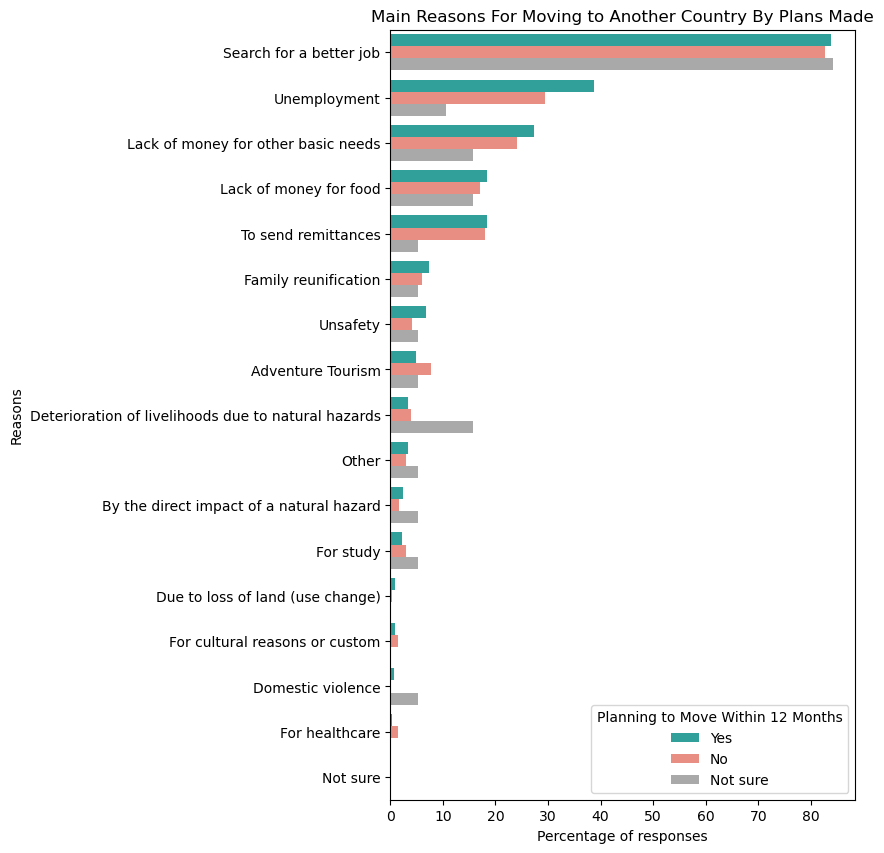

In [17]:
fig, ax = plt.subplots(figsize = (6, 10))
barplt = sns.barplot(data = mig_ext_motivo_df_pct_by_plan.sort_values(["Planning to Move Within 12 Months", "percentage"],
                                                                      ascending = False), 
            y = 'motivation', x = 'percentage', hue = 'Planning to Move Within 12 Months',
            palette = ['lightseagreen', 'salmon',  'darkgrey'],
            hue_order = ["Yes", "No", "Not sure"])
plt.title("Main Reasons For Moving to Another Country By Plans Made")
plt.xlabel("Percentage of responses")
plt.ylabel("Reasons")

## Reasons to migrate internally

In [18]:
ctam_main_df[ctam_main_df['mig_int_intention'] == 99]['mig_int_plan_12months'].unique()
# Note: those who do not intend to migrate ext or NS (0, 99) will have mig_ext_plan_12months = NAN
# Note: those who do intend to migrate ext (0) will have mig_ext_plan_12months = 0/1/99

array([nan])

In [19]:
# ctam_main_df['mig_any_intention'] = ctam_main_df['mig_int_intention'] + ctam_main_df['mig_ext_intention'] >= 
ctam_main_df[(ctam_main_df['mig_int_intention'] == 1) | (ctam_main_df['mig_ext_intention'] == 1)][['mig_int_intention', 'mig_ext_intention']]
ctam_main_df['mig_ext_only'] = (ctam_main_df['mig_ext_intention'] == 1).astype(int)
ctam_main_df['mig_int_only'] = (ctam_main_df['mig_int_intention'] == 1).astype(int)
ctam_main_df['mig_ext_ns'] = (ctam_main_df['mig_ext_intention'] == 1).astype(int)


In [20]:
ctam_main_df[['mig_ext_intention', 'mig_int_intention']].value_counts()

mig_ext_intention  mig_int_intention
0                  0                    2486
1                  0                    1227
                   1                     902
0                  1                     269
99                 0                      40
1                  99                     24
99                 99                     24
0                  99                     14
99                 1                      12
dtype: int64

In [21]:
len(ctam_main_df)

4998

In [22]:
cols_to_keep = [f'mig_int_pref_motivo/{n}' for n in range(1, 12)] + ['mig_ext_pref_motivo/99']
mig_int_motivo_df = ctam_main_df[['mig_int_intention', 'mig_int_plan_12months'] + cols_to_keep]

mig_int_motivo_df_pct = mig_int_motivo_df[mig_int_motivo_df['mig_int_intention'] == 1].mean().to_frame(name = 'percentage')
mig_int_motivo_df_pct.drop(index = ['mig_int_intention', 'mig_int_plan_12months'], inplace = True)
mig_int_motivo_df_pct.reset_index(inplace = True, names = 'motivation_choice')
mig_int_motivo_df_pct['motivation_choice'] = mig_int_motivo_df_pct['motivation_choice'].str.replace("mig_int_pref_motivo/", "")
mig_int_motivo_df_pct['percentage'] = mig_int_motivo_df_pct['percentage'] * 100

choice_labels = {"1": 'Search for a better job',
                 "2": "Family reunification",
                 "3": "Threats/extortion",
                 "4": "Domestic violence",
                 "5": "To find a larger/more comfortable space for family",
                 "6": "For independence or starting own family",
                 "7": "Better academic opportunities",
                 "8": "Deterioration of livelihoods due to natural hazards",
                 "9": "Direct impact of natural hazard",
                 "10": "Due to loss of land (use change)",
                 "11": "Other",
                 "99": "Not sure"
                 }
                 
mig_int_motivo_df_pct['motivation'] = mig_int_motivo_df_pct['motivation_choice'].map(choice_labels)

mig_int_motivo_df_pct


,motivation_choice,percentage,motivation
0,1,83.431953,Search for a better job
1,2,5.071851,Family reunification
2,3,3.719358,Threats/extortion
3,4,0.507185,Domestic violence
4,5,18.681319,To find a larger/more comfortable space for fa...
5,6,6.255283,For independence or starting own family
6,7,8.453085,Better academic opportunities
7,8,4.311074,Deterioration of livelihoods due to natural ha...
8,9,3.296703,Direct impact of natural hazard
9,10,0.507185,Due to loss of land (use change)


Text(0, 0.5, 'Reasons')

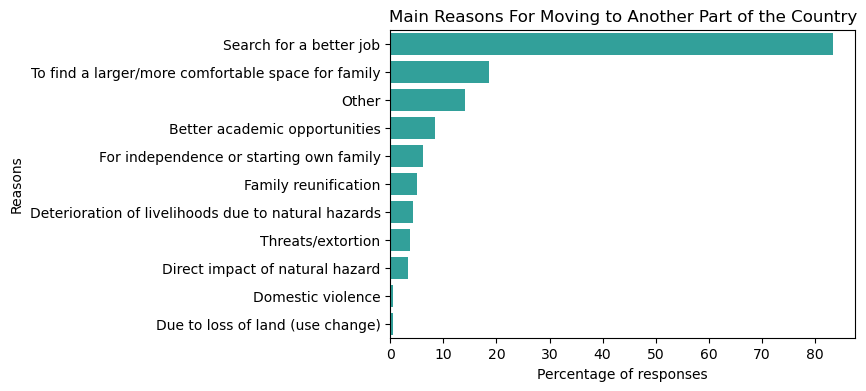

In [23]:
fig, ax = plt.subplots(figsize = (6, 4))
sns.barplot(data = mig_int_motivo_df_pct.sort_values("percentage", ascending = False), 
            y = 'motivation', x = 'percentage',
            color = 'lightseagreen')
plt.title("Main Reasons For Moving to Another Part of the Country")
plt.xlabel("Percentage of responses")
plt.ylabel("Reasons")

In [24]:
mig_int_motivo_df_pct_by_plan = mig_int_motivo_df[mig_int_motivo_df['mig_int_intention'] == 1].groupby('mig_int_plan_12months').mean()

mig_int_motivo_df_pct_by_plan.drop(columns = ['mig_int_intention'], inplace = True)
mig_int_motivo_df_pct_by_plan.reset_index(inplace = True)
mig_int_motivo_df_pct_by_plan = mig_int_motivo_df_pct_by_plan.melt(id_vars = 'mig_int_plan_12months', var_name = 'motivation_choice', value_name = 'percentage')
mig_int_motivo_df_pct_by_plan['motivation_choice'] = mig_int_motivo_df_pct_by_plan['motivation_choice'].str.replace("mig_int_pref_motivo/", "")
mig_int_motivo_df_pct_by_plan['motivation'] = mig_int_motivo_df_pct_by_plan['motivation_choice'].map(choice_labels)
mig_int_motivo_df_pct_by_plan['percentage'] = mig_int_motivo_df_pct_by_plan['percentage'] * 100

mig_int_motivo_df_pct_by_plan['mig_int_plan_12months'] = mig_int_motivo_df_pct_by_plan['mig_int_plan_12months'].map(ynns_labels)
mig_int_motivo_df_pct_by_plan.rename(columns = 
                                     {'mig_int_plan_12months': "Planning to Move Within 12 Months"}, 
                                     inplace = True)
mig_int_motivo_df_pct_by_plan.head()

,Planning to Move Within 12 Months,motivation_choice,percentage,motivation
0,No,1,84.262948,Search for a better job
1,Yes,1,79.754601,Search for a better job
2,Not sure,1,68.750000,Search for a better job
3,No,2,4.681275,Family reunification
4,Yes,2,6.748466,Family reunification


Text(0, 0.5, 'Reasons')

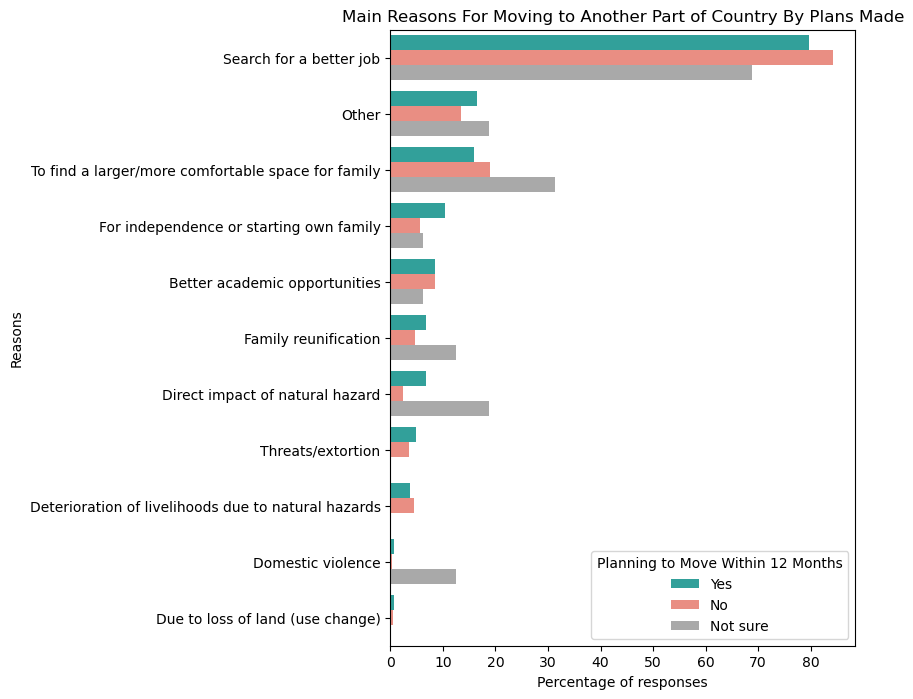

In [25]:
fig, ax = plt.subplots(figsize = (6, 8))
barplt = sns.barplot(data = mig_int_motivo_df_pct_by_plan.sort_values(["Planning to Move Within 12 Months", "percentage"], 
                                                                      ascending = False), 
            y = 'motivation', x = 'percentage', hue = 'Planning to Move Within 12 Months',
            palette = ['lightseagreen', 'salmon',  'darkgrey'],
            hue_order = ["Yes", "No", "Not sure"])
plt.title("Main Reasons For Moving to Another Part of Country By Plans Made")
plt.xlabel("Percentage of responses")
plt.ylabel("Reasons")

## Reasons to stay

In [26]:
# mig_motivo_stay/1
cols_to_keep = [f'mig_motivo_stay/{n}' for n in range(1, 10)] + ['mig_motivo_stay/99']

mig_stay_motivo_df = ctam_main_df[~ctam_main_df['mig_motivo_stay'].isna()][cols_to_keep]
mig_stay_motivo_df_pct = mig_stay_motivo_df.mean().to_frame(name = 'percentage')
mig_stay_motivo_df_pct.reset_index(inplace = True, names = 'motivation_choice')
mig_stay_motivo_df_pct['motivation_choice'] = mig_stay_motivo_df_pct['motivation_choice'].str.replace("mig_motivo_stay/", "")
mig_stay_motivo_df_pct['percentage'] = mig_stay_motivo_df_pct['percentage'] * 100

choice_labels = {"1": "Family separation",
                 "2": "Economic stability",
                 "3": "Availability of job opportunities",
                 "4": "The place currently living is safe",
                 "5": "Rootedness/sense of belonging",
                 "6": "Enjoying social status",
                 "7": "Availability of good public services",
                 "8": "Can afford good basic needs",
                 "9": "Other",
                 "99": "Not sure"
                 }
mig_stay_motivo_df_pct['motivation'] = mig_stay_motivo_df_pct['motivation_choice'].map(choice_labels)

mig_stay_motivo_df_pct


,motivation_choice,percentage,motivation
0,1,65.647627,Family separation
1,2,13.354787,Economic stability
2,3,6.637168,Availability of job opportunities
3,4,40.547064,The place currently living is safe
4,5,22.968624,Rootedness/sense of belonging
5,6,1.488335,Enjoying social status
6,7,4.344328,Availability of good public services
7,8,3.620274,Can afford good basic needs
8,9,12.469831,Other
9,99,3.620274,Not sure


In [27]:
len(mig_stay_motivo_df) # number of hhs to stay

2486

Text(0, 0.5, 'Reasons')

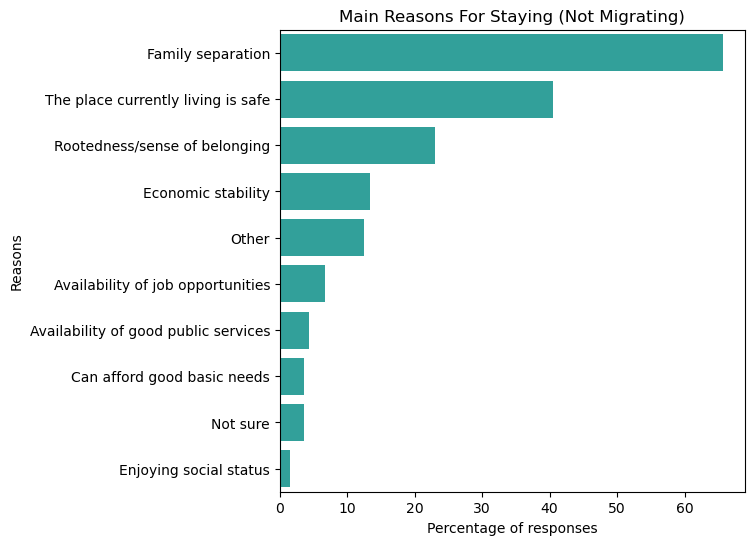

In [28]:
fig, ax = plt.subplots(figsize = (6, 6))
sns.barplot(data = mig_stay_motivo_df_pct.sort_values("percentage", ascending = False), 
            y = 'motivation', x = 'percentage',
            color = 'lightseagreen')
plt.title("Main Reasons For Staying (Not Migrating)")
plt.xlabel("Percentage of responses")
plt.ylabel("Reasons")

TODO: check levels of income, check where they live vs those who want to migrate

## Safety-Related

In [29]:
# list(ctam_main_df['municipio'].unique())

In [30]:
armed_conflict_data = pd.read_csv(root + "supplemental datasets/armed_conflicts_El_Salvador-Guatemala-Honduras.csv")
armed_conflict_data = armed_conflict_data[['event_type', 'sub_event_type',
                                           'country', 'admin1', 'admin2', 'admin3',
                                           'iso3', 'location', 'fatalities']]
armed_conflict_data

,event_type,sub_event_type,country,admin1,admin2,admin3,iso3,location,fatalities
0,Strategic developments,Arrests,Guatemala,Guatemala,Guatemala,NaN,GTM,Guatemala City,0
1,Battles,Armed clash,El Salvador,Usulutan,Jiquilisco,NaN,SLV,Jiquilisco,1
2,Battles,Armed clash,Honduras,Cortes,San Pedro Sula,San Pedro Sula,HND,San Pedro Sula,1
3,Violence against civilians,Attack,Guatemala,Guatemala,Amatitlan,NaN,GTM,Amatitlan,2
4,Battles,Armed clash,Guatemala,Guatemala,Mixco,NaN,GTM,Mixco,1
...,...,...,...,...,...,...,...,...,...
8892,Violence against civilians,Attack,Honduras,Atlantida,Esparta,Esparta,HND,Esparta,1
8893,Violence against civilians,Attack,Honduras,Francisco Morazan,Distrito Central,Distrito Central,HND,Tegucigalpa,1
8894,Violence against civilians,Attack,Honduras,Francisco Morazan,Distrito Central,Distrito Central,HND,Comayaguela,1
8895,Violence against civilians,Attack,Honduras,Cortes,Choloma,Choloma,HND,Choloma,1


In [31]:
armed_conflict_stats = armed_conflict_data.groupby('admin2').agg({'event_type': 'count', 'fatalities': 'sum'}).reset_index()
armed_conflict_stats

,admin2,event_type,fatalities
0,Acajutla,26,30
1,Agua Caliente,3,3
2,Aguilares,10,12
3,Ahuachapan,53,34
4,Ahuas,1,0
...,...,...,...
558,Zacapa,20,17
559,Zacatecoluca,32,40
560,Zacualpa,2,0
561,Zaragoza,17,18


Clean one location name

In [32]:
armed_conflict_stats.loc[armed_conflict_stats['admin2'] == 'San Buenaventura', 'admin2'] = 'San Buena Ventura'

In [33]:
ctam_main_df = ctam_main_df.merge(armed_conflict_stats, how = 'left',
                          left_on = 'municipio_label', right_on = 'admin2')
ctam_main_df.rename(columns = {'event_type': 'armed_conflict_counts'}, inplace = True)
ctam_main_df.head()

,start,end,note_confidenciality,organizacion,survey_pid,country,departamento,municipio,neighborhood,rural_urban,...,exp_food_pct,income_sources,migrated_yn_5,municipio_label,mig_ext_only,mig_int_only,mig_ext_ns,admin2,armed_conflict_counts,fatalities
0,2021-05-13T09:29:28.324-06:00,2021-05-13T09:59:31.341-06:00,NaN,1,34,SLV,1193,15748,Condominios delgado,2,...,0.282392,3,0,Delgado,0,0,0,Delgado,29.0,32.0
1,2021-05-13T08:44:14.642-06:00,2021-05-13T09:05:10.406-06:00,NaN,1,34,SLV,1193,15748,Condominios santa maria,2,...,0.491803,3,0,Delgado,1,0,1,Delgado,29.0,32.0
2,2021-05-13T08:10:59.086-06:00,2021-05-13T08:43:16.923-06:00,NaN,1,34,SLV,1193,15748,Condominios santa maria,2,...,0.427350,3,0,Delgado,1,0,1,Delgado,29.0,32.0
3,2021-05-13T09:53:37.283-06:00,2021-05-13T10:22:11.248-06:00,NaN,1,35,SLV,1193,15748,Condominio delgado,2,...,0.172811,3,0,Delgado,0,0,0,Delgado,29.0,32.0
4,2021-05-13T09:31:16.086-06:00,2021-05-13T09:53:06.037-06:00,NaN,1,35,SLV,1193,15748,Condominio delgado,2,...,0.421053,3,0,Delgado,0,1,0,Delgado,29.0,32.0


In [34]:
len(ctam_main_df[ctam_main_df['armed_conflict_counts'].isna()])

790

In [35]:
ctam_main_df[ctam_main_df['armed_conflict_counts'].isna()]['municipio_label'].unique()

array(['Tamahu', 'Rosario De Mora', 'Villa de San Francisco',
       'Fray Bartolome de Las Casas', 'Nueva Armenia', 'Curaren',
       'Camotan', 'San Antonio de Flores', 'Apacilagua', 'Orocuina',
       'Concepcion de Maria', 'San Jose La Arada', 'Cahabon', 'Barillas',
       'Sulaco', 'Concepcion De Ataco', 'Chiantla', 'Huehuetenango',
       'San Juan Atitan', 'Arenal', 'Alegria', 'Nenton',
       'San Sebastian Coatan', 'San Rafael La Independencia', 'Jocon',
       'Mercedes Umaña', 'Santiago De Maria', 'California',
       'Santa Eulalia', 'San Rafael Pie de la Cuesta',
       'San Francisco Javier', 'El Rodeo', 'San Juan Ixcoy',
       'Nuevo Progreso', 'Concepcion Huista', 'San Antonio Sacatepequez',
       'Jacaltenango', 'San Antonio de Cortes', 'Tacana', 'Sibinal'],
      dtype=object)

In [36]:
ctam_main_df['staying'] = ~(ctam_main_df['mig_motivo_stay'].isna())
ctam_main_df['staying'] = ctam_main_df['staying'].map({True: "Yes", False: "No / Not Sure"})

ctam_main_df['migrating'] = (ctam_main_df['mig_motivo_stay'].isna())
ctam_main_df['migrating'] = ctam_main_df['migrating'].map({True: "Migrate / Unsure", False: "Stay"})

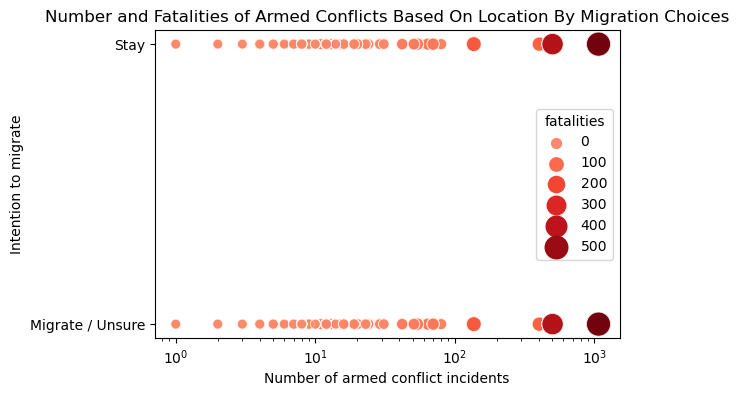

In [37]:
fig, ax = plt.subplots(figsize = (6, 4))

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    '''
    https://stackoverflow.com/a/18926541
    '''
    if isinstance(cmap, str):
        cmap = plt.get_cmap(cmap)
    new_cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

cmap_base = 'Reds'
vmin, vmax = 0.4, .98
cmap = truncate_colormap(cmap_base, vmin, vmax)

sns.scatterplot(data = ctam_main_df,
                x = 'armed_conflict_counts',
                size = 'fatalities',
                y = 'migrating', alpha = 0.8,
                hue_order = ["Migrate / Unsure", "Stay"],
                hue = 'fatalities', sizes = (50, 300),
                palette = cmap)
plt.xscale('log')
plt.title("Number and Fatalities of Armed Conflicts Based On Location By Migration Choices")
plt.xlabel("Number of armed conflict incidents")
plt.ylabel("Intention to migrate")
plt.show()

### insecurity types

In [38]:
# mig_motivo_stay/1
cols_to_keep = [f'inseguridad_comunidad/{n}' for n in range(1, 14)] + ['inseguridad_comunidad/99', 'migrating']

insecurity_df = ctam_main_df[cols_to_keep]
insecurity_df_pct = insecurity_df.groupby('migrating').mean().reset_index()
insecurity_df_pct = insecurity_df_pct.melt(id_vars = 'migrating', var_name = 'insecurity_choice', value_name = 'percentage')
insecurity_df_pct['insecurity_choice'] = insecurity_df_pct['insecurity_choice'].str.replace("inseguridad_comunidad/", "")
insecurity_df_pct['percentage'] = insecurity_df_pct['percentage'] * 100

choice_labels = {"1": "Robberies",
                 "2": "Extortion",
                 "3": "Confrontation of criminal groups",
                 "4": "Drug sales",
                 "5": "Smuggling",
                 "6": "Hitman",
                 "7": "Increase in prostitution",
                 "8": "Gender violence",
                 "9": "Domestic violence",
                 "10": "Kidnappings",
                 "11": "Toll collection",
                 "12": "Other",
                 "13": "None, it is very safe",
                 "99": "Not sure"
                 }
insecurity_df_pct['insecurity'] = insecurity_df_pct['insecurity_choice'].map(choice_labels)

insecurity_df_pct


,migrating,insecurity_choice,percentage,insecurity
0,Migrate / Unsure,1,25.159236,Robberies
1,Stay,1,20.313757,Robberies
2,Migrate / Unsure,2,4.976115,Extortion
3,Stay,2,2.051488,Extortion
4,Migrate / Unsure,3,3.463376,Confrontation of criminal groups
5,Stay,3,1.246983,Confrontation of criminal groups
6,Migrate / Unsure,4,9.474522,Drug sales
7,Stay,4,6.436042,Drug sales
8,Migrate / Unsure,5,1.035032,Smuggling
9,Stay,5,0.683829,Smuggling


Text(0, 0.5, 'Insecurities')

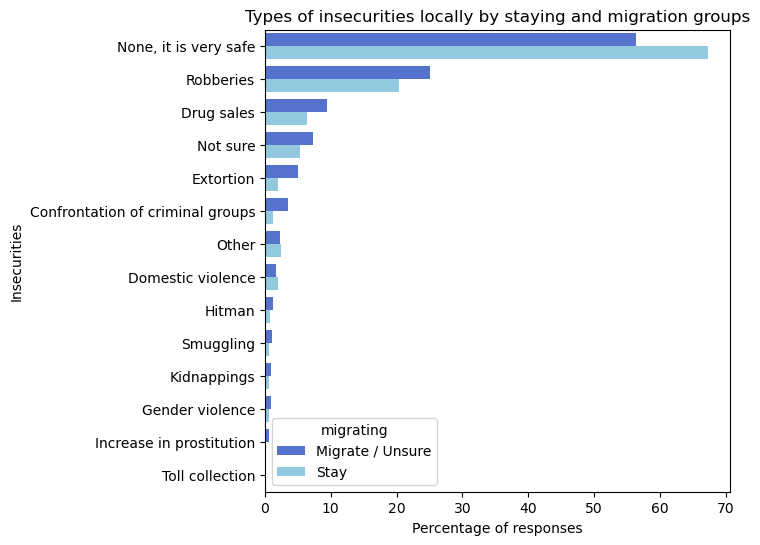

In [39]:
fig, ax = plt.subplots(figsize = (6, 6))
sns.barplot(data = insecurity_df_pct.sort_values("percentage", ascending = False), 
            y = 'insecurity', x = 'percentage', hue = 'migrating',
            hue_order = ['Migrate / Unsure', 'Stay'],
            palette = ['royalblue', 'skyblue'])
plt.title("Types of insecurities locally by staying and migration groups")
plt.xlabel("Percentage of responses")
plt.ylabel("Insecurities")

## Income

In [40]:
ctam_main_df['avg_income_currency'].unique()
# 1 dollars - el salvador 
# 2 lempiras - honduras
# 3 z - guatemala

array([nan,  1.,  3.,  2.])

In [41]:
ctam_main_df['avg_income_currency'].value_counts()

1.0    1199
3.0    1198
2.0     686
Name: avg_income_currency, dtype: int64

In [42]:
ctam_main_df['avg_income_consent'].value_counts()

1     3083
0     1245
99     670
Name: avg_income_consent, dtype: int64

In [43]:
ctam_main_df['avg_income_currency'].unique()

array([nan,  1.,  3.,  2.])

In [44]:
sum(ctam_main_df['avg_income_currency'].isna())

1915

In [45]:
ctam_main_df.loc[(ctam_main_df['avg_income_currency'].isna()) & (ctam_main_df['country'] == 'SLV'),
                 'avg_income_currency'] = 1
ctam_main_df.loc[(ctam_main_df['avg_income_currency'].isna()) & (ctam_main_df['country'] == 'HND'),
                 'avg_income_currency'] = 2
ctam_main_df.loc[(ctam_main_df['avg_income_currency'].isna()) & (ctam_main_df['country'] == 'GT'),
                 'avg_income_currency'] = 3
print(sum(ctam_main_df['avg_income_currency'].isna()))

0


In [46]:
ctam_main_df.loc[ctam_main_df['avg_income_currency'] == 1, 'avg_income_amt_dollars'] = ctam_main_df['avg_income_amount']
ctam_main_df.loc[ctam_main_df['avg_income_currency'] == 2, 'avg_income_amt_dollars'] = ctam_main_df['avg_income_amount'] * 0.041
ctam_main_df.loc[ctam_main_df['avg_income_currency'] == 3, 'avg_income_amt_dollars'] = ctam_main_df['avg_income_amount'] * 0.13

In [47]:
ctam_main_df['avg_income_per_member_dollar'] = ctam_main_df['avg_income_amt_dollars'] / ctam_main_df['hh_size']

In [48]:
ctam_main_df['debt_currency'].unique()
# 1 dollars - el salvador 
# 2 lempiras - honduras
# 3 quetzals - guatemala

array([nan,  1.,  3.,  2.])

In [49]:
ctam_main_df['debt_consent'].value_counts()

1.0     1074
0.0      282
99.0     110
Name: debt_consent, dtype: int64

In [50]:
ctam_main_df['debt_consent'].unique()

array([nan,  1., 99.,  0.])

In [51]:
sum(ctam_main_df['debt_currency'].isna())

3924

In [52]:
ctam_main_df.loc[(ctam_main_df['debt_currency'].isna()) & (ctam_main_df['country'] == 'SLV'),
                 'debt_currency'] = 1
ctam_main_df.loc[(ctam_main_df['debt_currency'].isna()) & (ctam_main_df['country'] == 'HND'),
                 'debt_currency'] = 2
ctam_main_df.loc[(ctam_main_df['debt_currency'].isna()) & (ctam_main_df['country'] == 'GT'),
                 'debt_currency'] = 3
print(sum(ctam_main_df['debt_currency'].isna()))

0


In [53]:
ctam_main_df.loc[ctam_main_df['debt_currency'] == 1, 'debt_amount_dollars'] = ctam_main_df['debt_amount']
ctam_main_df.loc[ctam_main_df['debt_currency'] == 2, 'debt_amount_dollars'] = ctam_main_df['debt_amount'] * 0.041
ctam_main_df.loc[ctam_main_df['debt_currency'] == 3, 'debt_amount_dollars'] = ctam_main_df['debt_amount'] * 0.13

In [54]:
ctam_main_df['saving_yn'].value_counts()


0     4400
1      500
99      98
Name: saving_yn, dtype: int64

Len consent df 853


Text(0.5, 1.0, 'Relationships between levels of income and debts and intentions to migrate')

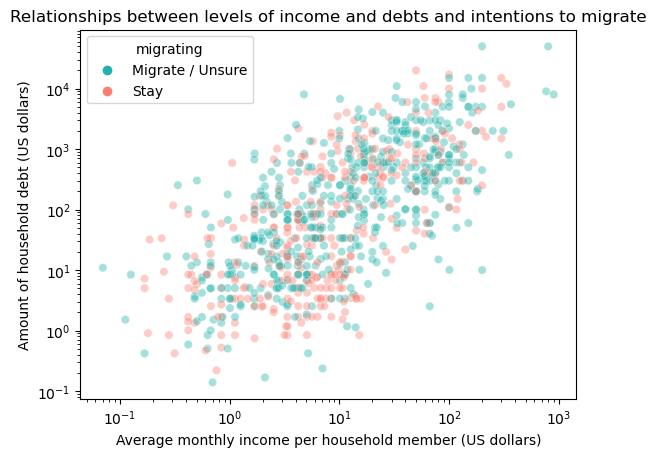

In [56]:
consent_df = ctam_main_df[(ctam_main_df['avg_income_consent'] == 1) & (ctam_main_df['debt_consent'] == 1)]
print(f"Len consent df {consent_df.shape[0]}")
sns.scatterplot(data = consent_df,
                x = 'avg_income_per_member_dollar',
                y = 'debt_amount_dollars',
                hue = 'migrating', alpha = 0.4,
                hue_order = ["Migrate / Unsure", "Stay"],
                palette = ['lightseagreen', 'salmon'])
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Average monthly income per household member (US dollars)")
plt.ylabel("Amount of household debt (US dollars)")
plt.title("Relationships between levels of income and debts and intentions to migrate")

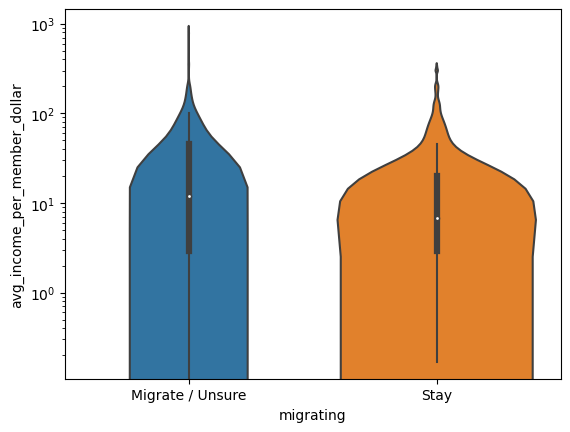

In [61]:
sns.violinplot(data = consent_df,
               x = 'migrating', y = 'avg_income_per_member_dollar')
plt.yscale('log')

/var/folders/kl/zzq83xsx65s2p501hz1mwvlw0000gn/T/ipykernel_2552/2317592226.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data = consent_df[consent_df['migrating'] == 'Migrate / Unsure'],
/var/folders/kl/zzq83xsx65s2p501hz1mwvlw0000gn/T/ipykernel_2552/2317592226.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data = consent_df[consent_df['migrating'] == 'Stay'],


Text(0.5, 1.0, 'Kernel density estimate of per-member income by intentions to migrate')

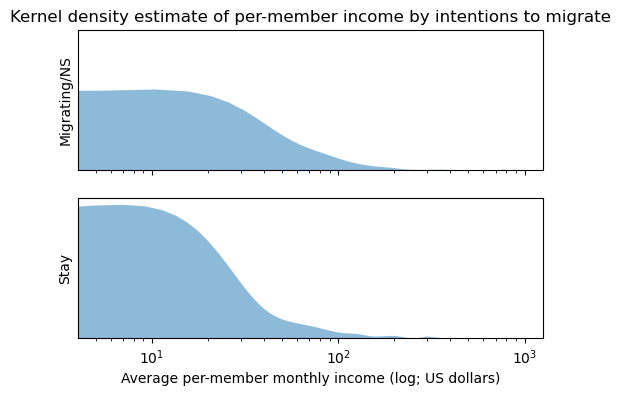

In [86]:
fig, axs = plt.subplots(2, 1, figsize = (6, 4), sharex = True, sharey = True)
sns.kdeplot(data = consent_df[consent_df['migrating'] == 'Migrate / Unsure'], 
            x = 'avg_income_per_member_dollar', #log_scale = True,
            fill = True, common_norm=False, palette="crest",
            alpha=.5, linewidth=0, ax = axs[0])
sns.kdeplot(data = consent_df[consent_df['migrating'] == 'Stay'], 
            x = 'avg_income_per_member_dollar', #log_scale = True,
            fill = True, common_norm=False, palette="crest",
            alpha=.5, linewidth=0, ax = axs[1])
axs[0].set_ylabel("Migrating/NS")
axs[1].set_ylabel("Stay")
# frame1 = plt.gca()
# frame1.axes.xaxis.set_ticklabels([])
# frame1.axes.yaxis.set_ticklabels([])
# plt.xticks([])
plt.xlabel("Average per-member monthly income (log; US dollars)")
plt.xscale('log')
plt.yticks([])
axs[0].set_title("Kernel density estimate of per-member income by intentions to migrate")

<Axes: xlabel='migrating', ylabel='avg_income_per_member_dollar'>

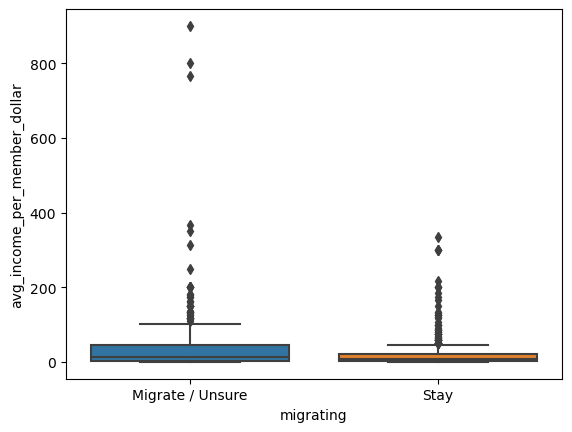

In [60]:
sns.boxplot(data = consent_df,
               x = 'migrating', y = 'avg_income_per_member_dollar')
# plt.yscale('log')

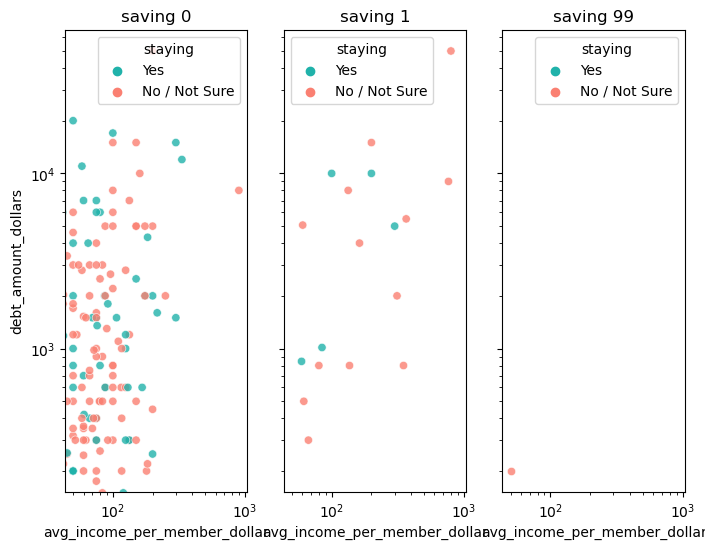

In [ ]:
fig, axs = plt.subplots(1, 3, figsize = (8, 6), sharex = True, sharey = True)

for i, saving_answer in enumerate(ctam_main_df['saving_yn'].unique()):
    sns.scatterplot(data = consent_df[consent_df['saving_yn'] == saving_answer],
                    x = 'avg_income_per_member_dollar',
                    y = 'debt_amount_dollars',
                    hue = 'staying', alpha = 0.8,
                    hue_order = ["Yes", "No / Not Sure"],
                    palette = ['lightseagreen', 'salmon'],
                    ax = axs[i])
    axs[i].set_title(f"saving {saving_answer}")
plt.xscale('log')
plt.yscale('log')


In [ ]:
ctam_main_df['debt_consent'].value_counts()

1.0     1074
0.0      282
99.0     110
Name: debt_consent, dtype: int64

In [ ]:
ctam_main_df[['country', 'avg_income_consent', 'avg_income_amount', 'avg_income_currency', 'hh_size', 'avg_income_per_member_dollar']].loc[ctam_main_df['avg_income_per_member_dollar'] < 1]['hh_size'].unique()

array([ 5, 11,  9,  6,  8,  4,  3,  7,  2,  1, 10, 12, 14, 13])

### Savings

In [ ]:
saving_by_migrating = ctam_main_df.groupby(['migrating', 'saving_yn'])['country'].count()
saving_by_migrating_df = saving_by_migrating / saving_by_migrating.groupby(level=0).sum()
saving_by_migrating_df = saving_by_migrating_df.to_frame().reset_index(level = 1)
saving_by_migrating_df['saving_yn'] = saving_by_migrating_df['saving_yn'].map({0: "No savings", 1: "Have savings", 99: "Not sure"})
saving_by_migrating_df.rename(columns = {'country': 'proportion', 'saving_yn': 'savings'}, inplace = True)
saving_by_migrating_df = saving_by_migrating_df.pivot(columns = 'savings', values = 'proportion')
saving_by_migrating_df.index.names = ['intentions to migrate']
saving_by_migrating_df

savings,Have savings,No savings,Not sure
intentions to migrate,,,
Migrate / Unsure,0.107882,0.872213,0.019904
Stay,0.092116,0.888576,0.019308


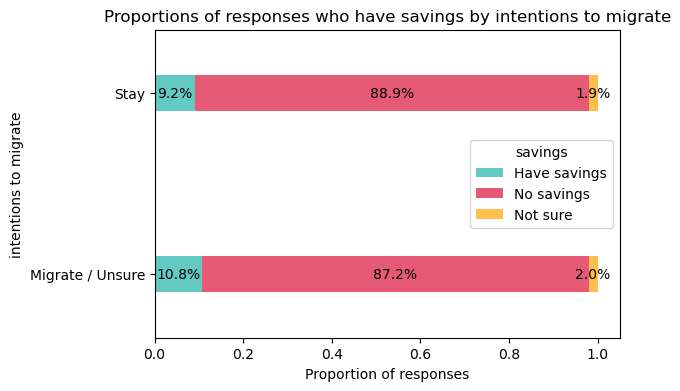

In [ ]:
ax = saving_by_migrating_df.plot(kind = 'barh', 
                    stacked = True, 
                    color = {'No savings': 'crimson',
                                'Have savings': 'lightseagreen',
                                "Not sure": "orange"},
                    width = 0.2, alpha = 0.7,
                    xlabel = "Proportion of responses",
                    title = "Proportions of responses who have savings by intentions to migrate",
                    figsize = (6, 4))
for container in ax.containers:
    ax.bar_label(container, labels = [f'{x * 100 :.1f}%' for x in container.datavalues], label_type = 'center')

## HH Roster

In [ ]:
roster_df = pd.read_csv(root + "dataset-1_central-american-survey/hh_roster.csv", index_col = 0)
roster_df

,hh_sex,hh_age,cond_migracion,escolaridad,work_30days,mig_ocupacion,orig_ocupacion,student_status,modalidad_educacion,no_escuela_why,...,_submission__id,_submission__uuid,_submission__submission_time,_submission__validation_status,_submission__notes,_submission__status,_submission__submitted_by,_submission__tags,country,migrated_yn
0,2,22,1,4.0,0.0,5.0,NaN,88.0,NaN,NaN,...,174925765,ccfb10fe-7afa-48d8-bea2-08c40c24d7b6,2021-04-30T00:34:53,NaN,[],submitted_via_web,NaN,[],GT,0
1,1,29,1,5.0,0.0,5.0,NaN,88.0,NaN,NaN,...,174925765,ccfb10fe-7afa-48d8-bea2-08c40c24d7b6,2021-04-30T00:34:53,NaN,[],submitted_via_web,NaN,[],GT,0
2,2,59,1,1.0,0.0,5.0,NaN,NaN,NaN,NaN,...,174925765,ccfb10fe-7afa-48d8-bea2-08c40c24d7b6,2021-04-30T00:34:53,NaN,[],submitted_via_web,NaN,[],GT,0
3,1,72,1,1.0,0.0,8.0,NaN,NaN,NaN,NaN,...,174925765,ccfb10fe-7afa-48d8-bea2-08c40c24d7b6,2021-04-30T00:34:53,NaN,[],submitted_via_web,NaN,[],GT,0
4,2,32,1,1.0,0.0,88.0,NaN,NaN,NaN,NaN,...,174925764,3342c82a-f4fd-4753-8503-2179bc6712ed,2021-04-30T00:34:52,NaN,[],submitted_via_web,NaN,[],GT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22364,2,51,1,4.0,1.0,2.0,NaN,NaN,NaN,NaN,...,177681079,6f714d43-c5d2-4ad6-900d-06004e2fb241,2021-05-13T16:55:55,NaN,[],submitted_via_web,NaN,[],SLV,0
22365,1,61,1,6.0,1.0,2.0,NaN,NaN,NaN,NaN,...,177681079,6f714d43-c5d2-4ad6-900d-06004e2fb241,2021-05-13T16:55:55,NaN,[],submitted_via_web,NaN,[],SLV,0
22366,1,11,1,4.0,0.0,9.0,NaN,1.0,3.0,NaN,...,177681082,3204a982-fb39-426b-9ea2-c957d8b5e222,2021-05-13T16:55:56,NaN,[],submitted_via_web,NaN,[],SLV,0
22367,2,27,1,8.0,1.0,1.0,NaN,88.0,NaN,NaN,...,177681082,3204a982-fb39-426b-9ea2-c957d8b5e222,2021-05-13T16:55:56,NaN,[],submitted_via_web,NaN,[],SLV,0


In [ ]:
len(roster_df['_submission__uuid'].unique())

4976

In [ ]:
print(roster_df['breastfeeding_yn'].value_counts())
print(roster_df['pregnant_yn'].value_counts())

0.0     6397
1.0      544
99.0       9
Name: breastfeeding_yn, dtype: int64
0.0     6702
1.0      232
99.0      16
Name: pregnant_yn, dtype: int64


In [ ]:
roster_df.loc[roster_df['escolaridad'] == 99, 'escolaridad'] = 0
roster_df.loc[roster_df['breastfeeding_yn'] == 99, 'breastfeeding_yn'] = 0
roster_df.loc[roster_df['pregnant_yn'] == 99, 'pregnant_yn'] = 0

roster_df['is_child'] = roster_df['hh_age'] < 15
roster_df['is_elder'] = roster_df['hh_age'] >= 65

roster_df['vulnerability_disability'] = roster_df['vulnerability/1'] == 1
roster_df['vulnerability_chronic'] = roster_df['vulnerability/2'] == 1

In [ ]:
hh_composition = roster_df.groupby('_submission__uuid').agg({'escolaridad' : 'max',
                                            'hh_age': 'mean',
                                            'pregnant_yn': 'max',
                                            'breastfeeding_yn': 'max',
                                            'is_child': 'sum',
                                            'is_elder': 'sum',
                                            'vulnerability_disability': 'sum',
                                            'vulnerability_chronic': 'sum'})
hh_composition.reset_index(inplace = True)
hh_composition.rename(columns = {'escolaridad': 'highest_educ',
                                 'hh_age': 'avg_age',
                                 'pregnant_yn': 'has_pregnant',
                                 'breastfeeding_yn': 'has_breastfeeding',
                                 'is_child': 'num_child_15',
                                 'is_elder': 'num_elderly_65',
                                 'vulnerability_disability': 'num_disability',
                                 'vulnerability_chronic': 'num_chronic'
                                 }, inplace = True)
hh_composition.head()

,_submission__uuid,highest_educ,avg_age,has_pregnant,has_breastfeeding,num_child_15,num_elderly_65,num_disability,num_chronic
0,001041a4-4559-4f59-843d-ffb0a9e75e22,3.0,31.000000,0.0,0.0,1,0,0,0
1,001e7f5c-2926-4612-93dc-9adbfb63917e,8.0,45.200000,0.0,0.0,0,1,0,0
2,0026f523-33ef-44a1-a528-fa73b18f3502,3.0,61.500000,NaN,NaN,0,0,0,1
3,00302df2-b730-4ba8-ba6a-8ef2699c7c16,6.0,72.500000,NaN,NaN,0,2,0,1
4,003f2628-766c-4585-8024-1df0a38116b5,7.0,31.833333,0.0,0.0,1,2,0,0


In [ ]:
hh_compo_df = ctam_main_df.merge(hh_composition, how = 'left',
                                  left_on = '_uuid', right_on = '_submission__uuid')
hh_compo_df

,start,end,note_confidenciality,organizacion,survey_pid,country,departamento,municipio,neighborhood,rural_urban,...,debt_amount_dollars,_submission__uuid,highest_educ,avg_age,has_pregnant,has_breastfeeding,num_child_15,num_elderly_65,num_disability,num_chronic
0,2021-05-13T09:29:28.324-06:00,2021-05-13T09:59:31.341-06:00,NaN,1,34,SLV,1193,15748,Condominios delgado,2,...,NaN,3204a982-fb39-426b-9ea2-c957d8b5e222,8.0,31.333333,0.0,0.0,1.0,0.0,0.0,2.0
1,2021-05-13T08:44:14.642-06:00,2021-05-13T09:05:10.406-06:00,NaN,1,34,SLV,1193,15748,Condominios santa maria,2,...,NaN,6f714d43-c5d2-4ad6-900d-06004e2fb241,8.0,44.666667,NaN,NaN,0.0,0.0,0.0,1.0
2,2021-05-13T08:10:59.086-06:00,2021-05-13T08:43:16.923-06:00,NaN,1,34,SLV,1193,15748,Condominios santa maria,2,...,NaN,da9eaf26-c33c-4b32-8a95-d0bdd2a2f4ef,6.0,55.250000,0.0,0.0,0.0,1.0,0.0,2.0
3,2021-05-13T09:53:37.283-06:00,2021-05-13T10:22:11.248-06:00,NaN,1,35,SLV,1193,15748,Condominio delgado,2,...,NaN,5de19d96-c5a8-44ca-81be-619abb979b9e,5.0,22.600000,0.0,0.0,2.0,0.0,0.0,0.0
4,2021-05-13T09:31:16.086-06:00,2021-05-13T09:53:06.037-06:00,NaN,1,35,SLV,1193,15748,Condominio delgado,2,...,600.000,858dbb65-055d-448e-ac10-5be3d4a8f866,5.0,16.666667,0.0,0.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,2021-04-29T09:57:28.139-06:00,2021-04-29T10:31:21.208-06:00,NaN,5,30,GT,GT16,GT1601,Barrio canton zona 8,2,...,NaN,08aa6f28-d9d5-41f3-8e71-910954f2fdc0,7.0,35.200000,0.0,0.0,1.0,1.0,0.0,0.0
4994,2021-04-29T10:44:36.260-06:00,2021-04-29T11:07:19.484-06:00,NaN,5,30,GT,GT16,GT1601,Barrio canton zona 8,2,...,1.521,1a80066b-f54e-45b3-b740-00df77b72d14,4.0,47.666667,0.0,0.0,0.0,1.0,0.0,0.0
4995,2021-04-29T14:14:14.013-06:00,2021-04-29T14:39:45.356-06:00,NaN,5,36,GT,GT20,GT2003,San juan ermita,2,...,2028.000,b5826f04-558c-4bd2-adaf-7bf45c8fe168,5.0,31.500000,0.0,0.0,0.0,0.0,1.0,0.0
4996,2021-04-29T14:40:13.473-06:00,2021-04-29T15:04:26.498-06:00,NaN,5,36,GT,GT20,GT2003,Sanjuan ermita,2,...,NaN,3342c82a-f4fd-4753-8503-2179bc6712ed,1.0,55.000000,NaN,NaN,0.0,1.0,2.0,0.0


### highest level of educ

In [ ]:
hh_compo_df = {1: 'No education',
               2: 'Preschool',
               3: "Primary",
               4: "High school",
               5: "General bac.",
               6: "Technical bac.",
               7: "Uni educ technician",
               8: "Bachelor's",
               9: "Postgraduate"}
            #    0: "Not sure"}
hh_compo_df['highest_educ'] = hh_compo_df['highest_educ'].map(educ_labels)

NameError: name 'educ_df' is not defined

In [ ]:
educ_df = hh_compo_df[['highest_educ', 'migrating', 'country']]
educ_df.to_csv(root + 'utilities/educ_df.csv')
educ_df

,highest_educ,migrating,country
0,8.0,Stay,SLV
1,8.0,Migrate / Unsure,SLV
2,6.0,Migrate / Unsure,SLV
3,5.0,Stay,SLV
4,5.0,Migrate / Unsure,SLV
...,...,...,...
4993,7.0,Stay,GT
4994,4.0,Stay,GT
4995,5.0,Migrate / Unsure,GT
4996,1.0,Stay,GT


In [ ]:
list(educ_labels.values())

['No education',
 'Preschool',
 'Primary',
 'High school',
 'General bac.',
 'Technical bac.',
 'Uni educ technician',
 "Bachelor's",
 'Postgraduate']

In [ ]:
educ_df['highest_educ'].unique()

array([ 8.,  6.,  5.,  3.,  7.,  2.,  4., nan,  1.,  9.])

In [ ]:
# educ_by_migrating = educ_df.groupby(['migrating', 'highest_educ'])['country'].count()
# educ_by_migrating_df = educ_by_migrating / educ_by_migrating.groupby(level=0).sum()
# educ_by_migrating_df = educ_by_migrating_df.to_frame().reset_index(level = 1)
# educ_by_migrating_df.rename(columns = {'country': 'proportion'}, inplace = True)
# educ_by_migrating_df = educ_by_migrating_df.pivot(columns = 'highest_educ', values = 'proportion')
# educ_by_migrating_df.index.names = ['intentions to migrate']
# educ_by_migrating_df = educ_by_migrating_df[list(educ_labels.values())]
# educ_by_migrating_df

In [ ]:
# ax = educ_by_migrating_df.plot(kind = 'barh', 
#                     stacked = True, 
#                     # color = {'No savings': 'crimson',
#                     #             'Have savings': 'lightseagreen',
#                     #             "Not sure": "orange"},
#                     width = 0.2, alpha = 0.7,
#                     xlabel = "Proportion of responses",
#                     title = "Proportions of households by highest education and intentions to migrate",
#                     figsize = (6, 6))
# for container in ax.containers:
#     ax.bar_label(container, labels = [f'{x * 100 :.1f}%' for x in container.datavalues], label_type = 'center')

In [ ]:
# educ_by_migrating_df.iloc[0].to_list()

NameError: name 'educ_by_migrating_df' is not defined

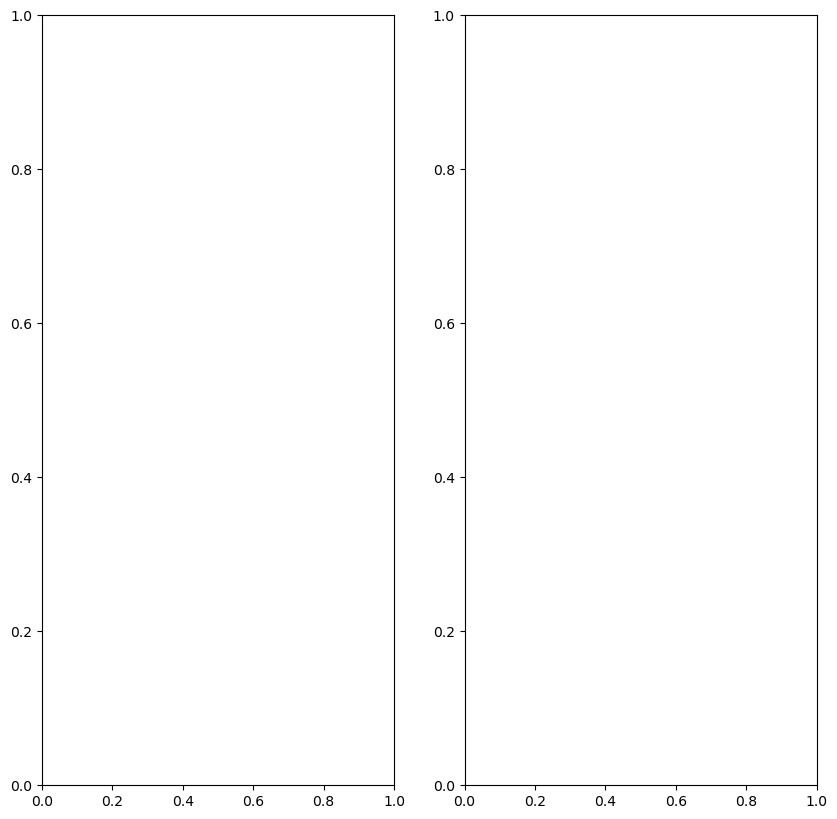

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (10, 10))

colors = sns.color_palette('pastel')[0:9]
axs[0].pie(educ_by_migrating_df.iloc[0].to_list(), labels = educ_labels.values(), 
        colors = colors, autopct='%.0f%%',
        startangle = 90, counterclock = False, 
        rotatelabels = True)
axs[0].set_title("Migrate / Not Sure")

axs[1].pie(educ_by_migrating_df.iloc[0].to_list(), labels = educ_labels.values(), 
        colors = colors, autopct='%.0f%%',
        startangle = 90, counterclock = False, 
        rotatelabels = True)
axs[1].set_title("Stay")

In [ ]:
cols = list(hh_composition.columns)
cols.remove('_submission__uuid')
hh_compo_df_export = hh_compo_df[['country', 'migrating', 'avg_income_per_member_dollar', 'debt_amount_dollars', 'hh_size'] + cols]
hh_compo_df_export.to_csv(root + "utilities/hh_characteristics.csv")

In [ ]:
sum(hh_compo_df['num_child_15'].isna())

22

# Costs of migration

In [ ]:
mig_ext_df = pd.read_csv(root + "dataset-1_central-american-survey/mig_ext_roster.csv", index_col = 0)
print(f"Number of records: {mig_ext_df.shape[0]}")
mig_ext_df

Number of records: 1624


,mig_ext_sex,mig_ext_age,mig_ext_motivo,mig_ext_motivo/1,mig_ext_motivo/2,mig_ext_motivo/3,mig_ext_motivo/4,mig_ext_motivo/5,mig_ext_motivo/6,mig_ext_motivo/7,...,_submission__tags,country,mig_ext_finance_group/1,mig_ext_finance_group/2,mig_ext_finance_group/3,mig_ext_medio_group/1,mig_ext_medio_group/2,mig_ext_medio_group/3,cost_per_attempt,migrated_yn
0,1,20,1 2 6,1,1,0,0,0,1,0,...,[],GT,0,1,0,0,1,0,NaN,1
1,2,35,1 8,1,0,0,0,0,0,0,...,[],HND,0,1,0,0,0,1,800.000000,1
2,1,44,1 2 6,1,1,0,0,0,1,0,...,[],HND,0,0,1,0,0,1,NaN,1
3,2,29,1 8,1,0,0,0,0,0,0,...,[],GT,1,0,0,0,1,0,3466.666667,1
4,2,35,1,1,0,0,0,0,0,0,...,[],SLV,0,1,0,0,1,0,5500.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619,1,42,1 2 8,1,1,0,0,0,0,0,...,[],SLV,0,1,0,0,1,0,NaN,1
1620,2,30,1 6 8,1,0,0,0,0,1,0,...,[],HND,0,1,0,0,0,1,NaN,1
1621,2,30,1 6,1,0,0,0,0,1,0,...,[],HND,0,0,0,0,0,1,NaN,1
1622,1,26,1,1,0,0,0,0,0,0,...,[],HND,0,1,0,1,0,0,NaN,1


In [ ]:
print(mig_ext_df['mig_ext_cost_awareness'].value_counts(normalize = False))
mig_ext_df['mig_ext_cost_awareness'].value_counts(normalize = True)

1     816
0     584
99    224
Name: mig_ext_cost_awareness, dtype: int64


1     0.502463
0     0.359606
99    0.137931
Name: mig_ext_cost_awareness, dtype: float64

In [ ]:
print(f"Number of N/A currency: {sum(mig_ext_df['mig_ext_cost_currency'].isna())}")
print(f"Number of N/A cost_total: {sum(mig_ext_df['mig_ext_cost_total'].isna())}")
mig_ext_df['mig_ext_cost_currency'].value_counts()

Number of N/A currency: 807
Number of N/A cost_total: 809


1.0    369
3.0    342
2.0    106
Name: mig_ext_cost_currency, dtype: int64

In [ ]:
mig_ext_df.loc[(~mig_ext_df['mig_ext_cost_currency'].isna()) & (mig_ext_df['mig_ext_cost_total'].isna()) ][['mig_ext_cost_currency', 'mig_ext_cost_total', 'mig_ext_cost_awareness']]

,mig_ext_cost_currency,mig_ext_cost_total,mig_ext_cost_awareness
324,1.0,NaN,1
325,1.0,NaN,1
338,1.0,NaN,1
760,2.0,NaN,1
1032,1.0,NaN,1


In [ ]:
print(sum(mig_ext_df[~mig_ext_df['mig_ext_cost_total'].isna()]['mig_ext_cost_currency'].isna()))

mig_ext_df.loc[(mig_ext_df['mig_ext_cost_currency'].isna()) & (~mig_ext_df['mig_ext_cost_total'].isna()) \
                & (mig_ext_df['country'] == 'SLV'),
                 'mig_ext_cost_currency'] = 1
mig_ext_df.loc[(mig_ext_df['mig_ext_cost_currency'].isna()) & (~mig_ext_df['mig_ext_cost_total'].isna()) & \
                (mig_ext_df['country'] == 'HND'),
                 'mig_ext_cost_currency'] = 2
mig_ext_df.loc[(mig_ext_df['mig_ext_cost_currency'].isna()) & (~mig_ext_df['mig_ext_cost_total'].isna()) & \
                (mig_ext_df['country'] == 'GT'),
                 'mig_ext_cost_currency'] = 3
print(sum(mig_ext_df[~mig_ext_df['mig_ext_cost_total'].isna()]['mig_ext_cost_currency'].isna()))


3
0


In [ ]:
mig_ext_df.loc[mig_ext_df['mig_ext_cost_currency'] == 1, 'mig_ext_cost_total_dollars'] = mig_ext_df['mig_ext_cost_total']
mig_ext_df.loc[mig_ext_df['mig_ext_cost_currency'] == 2, 'mig_ext_cost_total_dollars'] = mig_ext_df['mig_ext_cost_total'] * 0.041
mig_ext_df.loc[mig_ext_df['mig_ext_cost_currency'] == 3, 'mig_ext_cost_total_dollars'] = mig_ext_df['mig_ext_cost_total'] * 0.13

In [ ]:
mig_ext_df.to_csv(root + 'utilities/mig_ext_cleaned.csv')

In [ ]:
len(mig_ext_df['_submission__uuid'].unique())

1186

In [ ]:
mig_ext_df.groupby('_submission__uuid').agg({'mig_ext_cost_total_dollars': 'sum'})

,mig_ext_cost_total_dollars
_submission__uuid,
00302df2-b730-4ba8-ba6a-8ef2699c7c16,300.000
00424a9f-ba7e-4741-b5be-6d22555336e9,0.000
0065bc2c-4d62-42f5-9a7b-f760a1c042b9,2535.000
007770d7-9e8f-42a4-a990-c137c101e476,1436.500
008d2ef4-9cca-459b-9e7a-d5c4596923f0,7000.000
...,...
ff3877f2-4bee-44a1-b721-fd0b799ab50d,0.000
ff49d004-fe09-4ae0-be22-d43d99ede76e,2.028
ff74c305-7aa6-4fc1-9c35-927c0e8f20df,336.200


In [ ]:
mig_ext_main_df = ctam_main_df.merge(mig_ext_df.groupby('_submission__uuid').agg({'mig_ext_cost_total_dollars': 'sum'}), 
                                     how = 'left',
                                     left_on = '_uuid', right_index = True)
mig_ext_main_df.head()

,start,end,note_confidenciality,organizacion,survey_pid,country,departamento,municipio,neighborhood,rural_urban,...,mig_ext_ns,admin2,armed_conflict_counts,fatalities,staying,migrating,avg_income_amt_dollars,avg_income_per_member_dollar,debt_amount_dollars,mig_ext_cost_total_dollars
0,2021-05-13T09:29:28.324-06:00,2021-05-13T09:59:31.341-06:00,NaN,1,34,SLV,1193,15748,Condominios delgado,2,...,0,Delgado,29.0,32.0,Yes,Stay,NaN,NaN,NaN,NaN
1,2021-05-13T08:44:14.642-06:00,2021-05-13T09:05:10.406-06:00,NaN,1,34,SLV,1193,15748,Condominios santa maria,2,...,1,Delgado,29.0,32.0,No / Not Sure,Migrate / Unsure,500.0,166.666667,NaN,NaN
2,2021-05-13T08:10:59.086-06:00,2021-05-13T08:43:16.923-06:00,NaN,1,34,SLV,1193,15748,Condominios santa maria,2,...,1,Delgado,29.0,32.0,No / Not Sure,Migrate / Unsure,300.0,75.000000,NaN,NaN
3,2021-05-13T09:53:37.283-06:00,2021-05-13T10:22:11.248-06:00,NaN,1,35,SLV,1193,15748,Condominio delgado,2,...,0,Delgado,29.0,32.0,Yes,Stay,350.0,70.000000,NaN,NaN
4,2021-05-13T09:31:16.086-06:00,2021-05-13T09:53:06.037-06:00,NaN,1,35,SLV,1193,15748,Condominio delgado,2,...,0,Delgado,29.0,32.0,No / Not Sure,Migrate / Unsure,347.0,115.666667,600.0,NaN


Len mig_cost_income_df df 750


Text(0.5, 1.0, 'Relationships between levels of income and costs of migration by intentions to migrate')

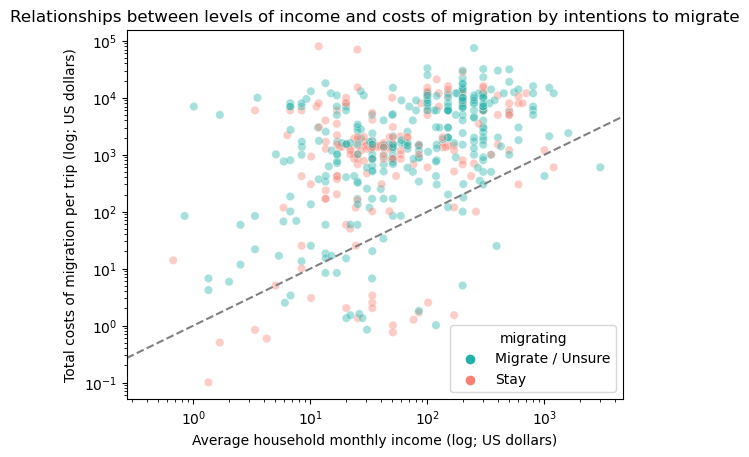

In [ ]:
mig_cost_income_df = mig_ext_main_df[(~mig_ext_main_df['avg_income_amt_dollars'].isna()) & \
                                    (~mig_ext_main_df['mig_ext_cost_total_dollars'].isna()) & \
                                    (mig_ext_main_df['avg_income_amt_dollars'] > 0)]
print(f"Len mig_cost_income_df df {mig_cost_income_df.shape[0]}")
ax = sns.scatterplot(data = mig_cost_income_df,
                x = 'avg_income_amt_dollars',
                y = 'mig_ext_cost_total_dollars',
                hue = 'migrating', alpha = 0.4,
                hue_order = ["Migrate / Unsure", "Stay"],
                palette = ['lightseagreen', 'salmon'])
ax.axline([0, 0], [1, 1], color = 'gray', ls = '--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Average household monthly income (log; US dollars)")
plt.ylabel("Total costs of migration per trip (log; US dollars)")
plt.title("Relationships between levels of income and costs of migration by intentions to migrate")

### finance for migration

In [ ]:
cols_to_keep = [f'mig_ext_finance/{n}' for n in range(1, 12)] + ['mig_ext_finance/99']
mig_ext_finance_df = mig_ext_df[cols_to_keep]

mig_ext_finance_df_pct = mig_ext_finance_df.mean().to_frame(name = 'percentage')
# mig_ext_motivo_df_pct.drop(index = ['mig_ext_intention', 'mig_ext_plan_12months'], inplace = True)
mig_ext_finance_df_pct.reset_index(inplace = True, names = 'mig_finance_channel_choice')
mig_ext_finance_df_pct['mig_finance_channel_choice'] = mig_ext_finance_df_pct['mig_finance_channel_choice'].str.replace("mig_ext_finance/", "")
mig_ext_finance_df_pct['percentage'] = mig_ext_finance_df_pct['percentage'] * 100

choice_labels = {"1": "Bank loan",
                 "2": "House mortgage",
                 "3": "Loans with lender",
                 "4": "Cooperative loan",
                 "5": "Loan from a relative/friend abroad",
                 "6": "Gift from a relative/friend abroad",
                 "7": "Savings",
                 "8": "Domestic family loan",
                 "9": "With work when arriving at destination",
                 "10": "Sold property or property",
                 "11": "Other",
                 "12": "Not sure",
                 "99": "Not sure"
                 }
mig_ext_finance_df_pct['mig_finance_channel'] = mig_ext_finance_df_pct['mig_finance_channel_choice'].map(choice_labels)

mig_ext_finance_df_pct


,mig_finance_channel_choice,percentage,mig_finance_channel
0,1,10.344828,Bank loan
1,2,3.263547,House mortgage
2,3,6.034483,Loans with lender
3,4,2.278325,Cooperative loan
4,5,24.568966,Loan from a relative/friend abroad
5,6,13.177340,Gift from a relative/friend abroad
6,7,18.165025,Savings
7,8,9.544335,Domestic family loan
8,9,2.216749,With work when arriving at destination
9,10,4.495074,Sold property or property


Text(0, 0.5, 'Channel')

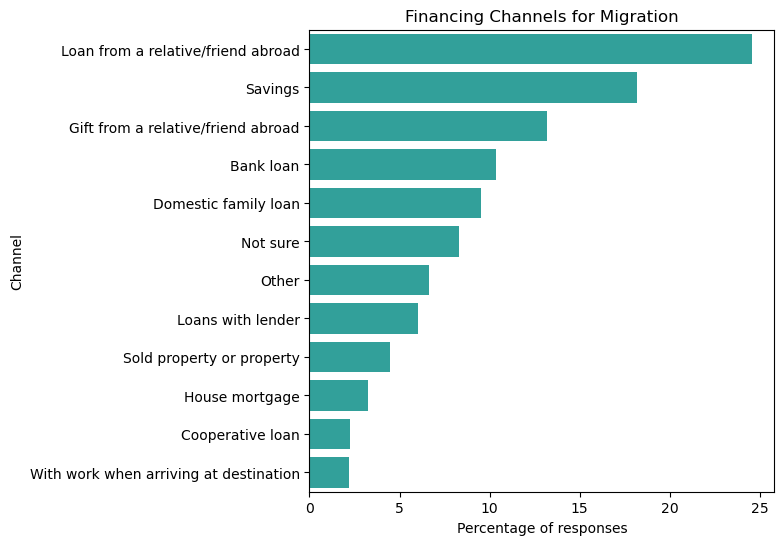

In [ ]:
fig, ax = plt.subplots(figsize = (6, 6))
sns.barplot(data = mig_ext_finance_df_pct.sort_values("percentage", ascending = False), 
            y = 'mig_finance_channel', x = 'percentage',
            color = 'lightseagreen')
plt.title("Financing Channels for Migration")
plt.xlabel("Percentage of responses")
plt.ylabel("Channel")

### Violence during migration

In [ ]:
cols_to_keep = [f'mig_ext_violence/{n}' for n in range(1, 12)] + ['mig_ext_violence/99']
mig_ext_violence_df = mig_ext_df[cols_to_keep]

mig_ext_violence_df_pct = mig_ext_violence_df.mean().to_frame(name = 'percentage')
# mig_ext_motivo_df_pct.drop(index = ['mig_ext_intention', 'mig_ext_plan_12months'], inplace = True)
mig_ext_violence_df_pct.reset_index(inplace = True, names = 'mig_violence_choice')
mig_ext_violence_df_pct['mig_violence_choice'] = mig_ext_violence_df_pct['mig_violence_choice'].str.replace("mig_ext_violence/", "")
mig_ext_violence_df_pct['percentage'] = mig_ext_violence_df_pct['percentage'] * 100

choice_labels = {"1": "None",
                 "2": "Extortion",
                 "3": "Theft",
                 "4": "Armed robbery",
                 "5": "Threat/Intimidation",
                 "6": "Physical aggression",
                 "7": "Sexual harassment/assault",
                 "8": "Kidnapping",
                 "9": "Attempted murder",
                 "10": "Died/Lost",
                 "11": "Other",
                 "99": "Not sure"
                 }
mig_ext_violence_df_pct['mig_violence'] = mig_ext_violence_df_pct['mig_violence_choice'].map(choice_labels)

mig_ext_violence_df_pct.sort_values("percentage", ascending = False)


,mig_violence_choice,percentage,mig_violence
0,1,71.897518,None
10,11,10.488391,Other
5,6,4.483587,Physical aggression
2,3,4.003203,Theft
3,4,3.282626,Armed robbery
11,99,3.168156,Not sure
4,5,3.042434,Threat/Intimidation
7,8,2.241793,Kidnapping
1,2,2.081665,Extortion
9,10,0.560448,Died/Lost


In [ ]:
severity_group = {1: 'None',
                  2: 'Financial',
                  3: 'Financial',
                  4: 'Life threatening',
                  5: 'Abuse',
                  6: 'Abuse',
                  7: 'Abuse',
                  8: 'Life threatening',
                  9: 'Life threatening',
                  10: 'Life threatening',
                  11: 'Other',
                  99: 'None'}

mig_ext_violence_df_pct['severity'] = mig_ext_violence_df_pct['mig_violence_choice'].astype(int).map(severity_group)
mig_ext_violence_df_pct.sort_values("percentage", ascending = False, inplace = True)
mig_ext_violence_df_pct

,mig_violence_choice,percentage,mig_violence,severity
0,1,71.897518,None,None
10,11,10.488391,Other,Other
5,6,4.483587,Physical aggression,Abuse
2,3,4.003203,Theft,Financial
3,4,3.282626,Armed robbery,Life threatening
11,99,3.168156,Not sure,None
4,5,3.042434,Threat/Intimidation,Abuse
7,8,2.241793,Kidnapping,Life threatening
1,2,2.081665,Extortion,Financial
9,10,0.560448,Died/Lost,Life threatening


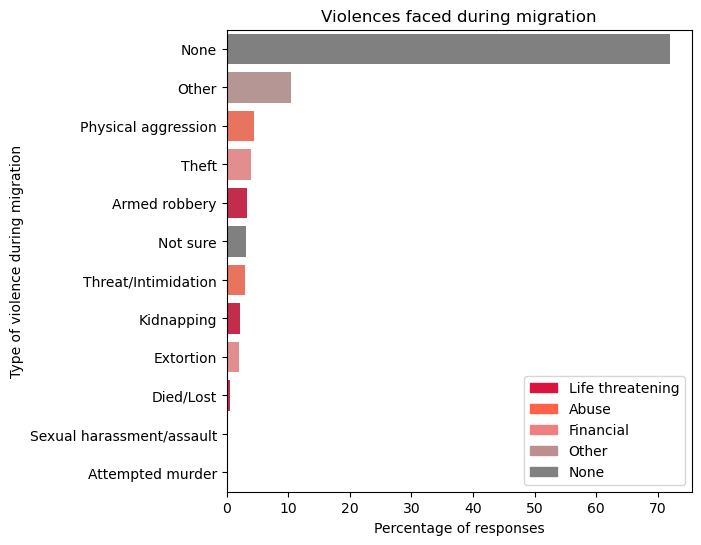

In [ ]:
colors = {"None": 'gray',
                  "Extortion": 'lightcoral',
                  "Theft": 'lightcoral',
                  "Armed robbery": 'crimson',
                  "Threat/Intimidation": 'tomato',
                  "Physical aggression": 'tomato',
                  "Sexual harassment/assault": 'tomato',
                  "Kidnapping": 'crimson',
                  "Attempted murder": 'crimson',
                  "Died/Lost": 'crimson',
                  "Other": 'rosybrown',
                  "Not sure": 'gray'}
fig, ax = plt.subplots(figsize = (6, 6))
sns.barplot(data = mig_ext_violence_df_pct, 
            y = 'mig_violence', x = 'percentage',
            palette = colors)
plt.title("Violences faced during migration")
plt.xlabel("Percentage of responses")
plt.ylabel("Type of violence during migration")


crimson_patch = mpatches.Patch(color='crimson', label='Life threatening')
tomato_patch = mpatches.Patch(color='tomato', label='Abuse')
lightcoral_patch = mpatches.Patch(color='lightcoral', label='Financial')
rosybrown_patch = mpatches.Patch(color='rosybrown', label='Other')
gray_patch = mpatches.Patch(color='gray', label = 'None')
plt.legend(handles = [crimson_patch, tomato_patch, 
                      lightcoral_patch, rosybrown_patch, gray_patch],
           loc = 'lower right')

plt.show()

### Remittances

In [ ]:
ctam_main_df['remesa_amount_consent'].unique()

array([nan,  0.,  1., 99.])

In [ ]:
print(sum(ctam_main_df['remesa_amount_consent'].isna()))
ctam_main_df['remesa_amount_consent'].value_counts()

3583


1.0     1027
0.0      271
99.0     117
Name: remesa_amount_consent, dtype: int64

In [ ]:
print(ctam_main_df['remesa_currency'].unique())

ctam_main_df['remesa_currency'].value_counts()

[nan  1.  2.  3.]


1.0    607
3.0    248
2.0    172
Name: remesa_currency, dtype: int64

In [ ]:
sum(~ctam_main_df['remesa_amount'].isna())

1027

In [ ]:
ctam_main_df.loc[ctam_main_df['remesa_currency'] == 1, 'remesa_amount_dollars'] = ctam_main_df['remesa_amount']
ctam_main_df.loc[ctam_main_df['remesa_currency'] == 2, 'remesa_amount_dollars'] = ctam_main_df['remesa_amount'] * 0.041
ctam_main_df.loc[ctam_main_df['remesa_currency'] == 3, 'remesa_amount_dollars'] = ctam_main_df['remesa_amount'] * 0.13

Len consent df 776


Text(0.5, 1.0, 'Relationships between levels of income and amount of remittances received')

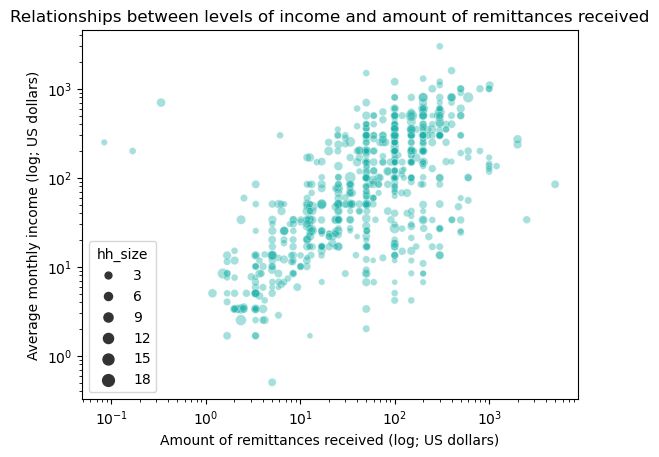

In [ ]:
remit_df = ctam_main_df[(~ctam_main_df['avg_income_amt_dollars'].isna()) & (~ctam_main_df['remesa_amount_dollars'].isna())]
print(f"Len consent df {remit_df.shape[0]}")
ax = sns.scatterplot(data = remit_df,
                x = 'remesa_amount_dollars',
                y = 'avg_income_amt_dollars', alpha = 0.4,
                size = 'hh_size',
                color = 'lightseagreen')
# ax.axline([0, 0], [1, 1], color = 'gray', ls = '--')
plt.xscale('log')
plt.yscale('log')
plt.ylabel("Average monthly income (log; US dollars)")
plt.xlabel("Amount of remittances received (log; US dollars)")
plt.title("Relationships between levels of income and amount of remittances received")

# Quality of lives after migration

In [ ]:
ctam_main_df['remit_received'] = (~(ctam_main_df['remesa_amount_dollars'].isna())).astype(int)
ctam_main_df['remit_received'].value_counts()

0    3971
1    1027
Name: remit_received, dtype: int64

In [ ]:
ctam_main_df['level_satisfaction_living'].value_counts()

1     2505
0     2427
99      66
Name: level_satisfaction_living, dtype: int64

In [ ]:
ctam_main_df['life_satisfaction'] = ctam_main_df['level_satisfaction_living'].map({1: "Satisfied",
                                                                                   0: "Unsatisfied",
                                                                                   99: "Not sure"})
ctam_main_df['remit_received'] = ctam_main_df['remit_received'].map({1: "Yes", 0: "No"})

In [ ]:
saving_by_migrating = ctam_main_df.groupby(['migrating', 'saving_yn'])['country'].count()
saving_by_migrating_df = saving_by_migrating / saving_by_migrating.groupby(level=0).sum()
saving_by_migrating_df = saving_by_migrating_df.to_frame().reset_index(level = 1)
saving_by_migrating_df['saving_yn'] = saving_by_migrating_df['saving_yn'].map({0: "No savings", 1: "Have savings", 99: "Not sure"})
saving_by_migrating_df.rename(columns = {'country': 'proportion', 'saving_yn': 'savings'}, inplace = True)
saving_by_migrating_df = saving_by_migrating_df.pivot(columns = 'savings', values = 'proportion')
saving_by_migrating_df.index.names = ['intentions to migrate']
saving_by_migrating_df

In [ ]:
life_satis_df = ctam_main_df.groupby(['remit_received'])[['life_satisfaction']].value_counts(normalize = True)
life_satis_df = life_satis_df.to_frame().reset_index(level = 1)
life_satis_df.rename(columns = {0: "percentage"}, inplace = True)
life_satis_df['percentage'] = life_satis_df['percentage'] * 100
life_satis_df

,life_satisfaction,percentage
remit_received,,
No,Unsatisfied,51.976832
No,Satisfied,46.688492
No,Not sure,1.334676
Yes,Satisfied,63.388510
Yes,Unsatisfied,35.345667
Yes,Not sure,1.265823


In [ ]:
life_satis_df = life_satis_df.pivot(columns = 'life_satisfaction', values = 'percentage')
# life_satis_df.index.names = ['intentions to migrate']
life_satis_df = life_satis_df[['Satisfied', 'Unsatisfied', 'Not sure']]
life_satis_df

life_satisfaction,Satisfied,Unsatisfied,Not sure
remit_received,,,
No,46.688492,51.976832,1.334676
Yes,63.388510,35.345667,1.265823


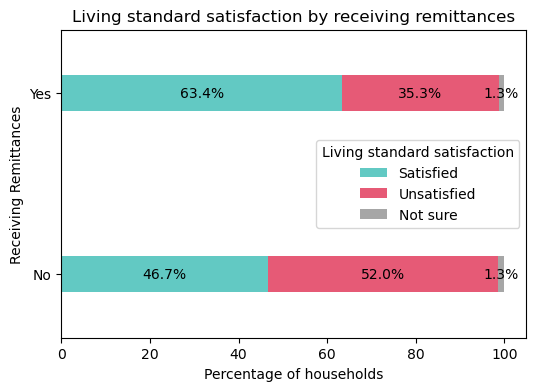

In [ ]:
ax = life_satis_df.plot(kind = 'barh', 
                    stacked = True, 
                    color = {'Satisfied': 'lightseagreen',
                            'Unsatisfied': 'crimson',
                            "Not sure": "gray"},
                    width = 0.2, alpha = 0.7,
                    xlabel = "Percentage of households",
                    ylabel = "Receiving Remittances",
                    title = "Living standard satisfaction by receiving remittances",
                    figsize = (6, 4))
plt.legend(title = "Living standard satisfaction")
for container in ax.containers:
    ax.bar_label(container, labels = [f'{x :.1f}%' for x in container.datavalues], label_type = 'center')